### SmartPhone Price prediction using XGBoost

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


In [2]:
df = pd.read_csv("smartphones_data.csv")

In [3]:
df.head()

,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types
0,vivo,vivo v50,34999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,50.0,1,6.77,120.0,amoled display
1,realme,realme p3 pro,21999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.83,120.0,amoled display
2,realme,realme 14 pro plus,27999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,3,32.0,1,6.83,120.0,oled display
3,samsung,samsung galaxy s25 ultra,129999,12.0,android,256.0,5000,Yes,Yes,Yes,Yes,snapdragon,8.0,200.0,4,12.0,1,6.90,120.0,amoled display
4,vivo,vivo t3 pro,22999,8.0,android,128.0,5500,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.77,120.0,amoled display


In [4]:
df.describe()

,Price,RAM,storage,Battery_cap,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz)
count,3260.000000,3260.000000,3260.000000,3260.000000,3085.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,1529.000000
mean,20181.384356,5.065874,112.040893,4163.485583,7.089141,32.655828,2.076994,12.555767,1.026994,6.097110,100.375409
std,24145.388368,3.256896,126.893532,1312.404904,1.682527,29.397695,0.990856,10.564795,0.162090,0.741478,24.920299
min,2500.000000,0.250000,0.310000,1100.000000,1.000000,0.300000,1.000000,0.300000,1.000000,2.400000,60.000000
25%,7490.000000,3.000000,32.000000,3007.500000,8.000000,12.000000,1.000000,5.000000,1.000000,5.500000,90.000000
50%,11999.000000,4.000000,64.000000,4500.000000,8.000000,16.000000,2.000000,8.000000,1.000000,6.455000,120.000000
75%,21999.000000,8.000000,128.000000,5000.000000,8.000000,50.000000,3.000000,16.000000,1.000000,6.670000,120.000000
max,200999.000000,24.000000,1024.000000,22000.000000,10.000000,200.000000,5.000000,60.000000,2.000000,8.030000,165.000000


#### Copying the dataset

In [5]:
df1 = df.copy()

In [6]:
df1.head()

,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types
0,vivo,vivo v50,34999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,50.0,1,6.77,120.0,amoled display
1,realme,realme p3 pro,21999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.83,120.0,amoled display
2,realme,realme 14 pro plus,27999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,3,32.0,1,6.83,120.0,oled display
3,samsung,samsung galaxy s25 ultra,129999,12.0,android,256.0,5000,Yes,Yes,Yes,Yes,snapdragon,8.0,200.0,4,12.0,1,6.90,120.0,amoled display
4,vivo,vivo t3 pro,22999,8.0,android,128.0,5500,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.77,120.0,amoled display


In [7]:
print("Shape of dataset:", df1.shape)

Shape of dataset: (3260, 20)


In [8]:
df1.describe()

,Price,RAM,storage,Battery_cap,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz)
count,3260.000000,3260.000000,3260.000000,3260.000000,3085.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,1529.000000
mean,20181.384356,5.065874,112.040893,4163.485583,7.089141,32.655828,2.076994,12.555767,1.026994,6.097110,100.375409
std,24145.388368,3.256896,126.893532,1312.404904,1.682527,29.397695,0.990856,10.564795,0.162090,0.741478,24.920299
min,2500.000000,0.250000,0.310000,1100.000000,1.000000,0.300000,1.000000,0.300000,1.000000,2.400000,60.000000
25%,7490.000000,3.000000,32.000000,3007.500000,8.000000,12.000000,1.000000,5.000000,1.000000,5.500000,90.000000
50%,11999.000000,4.000000,64.000000,4500.000000,8.000000,16.000000,2.000000,8.000000,1.000000,6.455000,120.000000
75%,21999.000000,8.000000,128.000000,5000.000000,8.000000,50.000000,3.000000,16.000000,1.000000,6.670000,120.000000
max,200999.000000,24.000000,1024.000000,22000.000000,10.000000,200.000000,5.000000,60.000000,2.000000,8.030000,165.000000


In [9]:
df1.isnull().sum()

brand_name                 0
Name                       0
Price                      0
RAM                        0
OS                         0
storage                    0
Battery_cap                0
has_fast_charging          0
has_fingerprints         726
has_nfc                  726
has_5g                   726
processor_brand            0
num_core                 175
primery_rear_camera        0
Num_Rear_Cameras           0
primery_front_camera       0
num_front_camera           0
display_size(inch)         0
refresh_rate(hz)        1731
display_types              0
dtype: int64

In [10]:
df1.drop_duplicates(inplace=True)

In [11]:
print(df1.columns)

Index(['brand_name', 'Name', 'Price', 'RAM', 'OS', 'storage', 'Battery_cap',
       'has_fast_charging', 'has_fingerprints', 'has_nfc', 'has_5g',
       'processor_brand', 'num_core', 'primery_rear_camera',
       'Num_Rear_Cameras', 'primery_front_camera', 'num_front_camera',
       'display_size(inch)', 'refresh_rate(hz)', 'display_types'],
      dtype='object')


#### Renaming the columns which has improper names 

In [12]:
df1.rename(columns={'primery_rear_camera': 'primary_rear_camera',
                    'primery_front_camera': 'primary_front_camera'}, inplace=True)

In [13]:
df.nunique()

brand_name                33
Name                    3260
Price                   1193
RAM                       15
OS                         3
storage                   13
Battery_cap              240
has_fast_charging          2
has_fingerprints           2
has_nfc                    2
has_5g                     2
processor_brand           15
num_core                   6
primery_rear_camera       31
Num_Rear_Cameras           5
primery_front_camera      32
num_front_camera           2
display_size(inch)       102
refresh_rate(hz)           5
display_types              5
dtype: int64

#### Calculating the missing value percentage

In [14]:
# Calculate missing percentage
missing_percentage = (df1.isnull().sum() / len(df1)) * 100
missing_percentage

brand_name               0.000000
Name                     0.000000
Price                    0.000000
RAM                      0.000000
OS                       0.000000
storage                  0.000000
Battery_cap              0.000000
has_fast_charging        0.000000
has_fingerprints        22.269939
has_nfc                 22.269939
has_5g                  22.269939
processor_brand          0.000000
num_core                 5.368098
primary_rear_camera      0.000000
Num_Rear_Cameras         0.000000
primary_front_camera     0.000000
num_front_camera         0.000000
display_size(inch)       0.000000
refresh_rate(hz)        53.098160
display_types            0.000000
dtype: float64

### Data Cleannig and Preprocessing

##### Imputing Categorical Values(Columns)

In [15]:
df1['has_fingerprints'].fillna(df1['has_fingerprints'].mode()[0], inplace=True)
df1['has_nfc'].fillna(df1['has_nfc'].mode()[0], inplace=True)
df1['has_5g'].fillna(df1['has_5g'].mode()[0], inplace=True)

#### Imputing missing values in numerical columns

In [16]:
df1['num_core'].fillna(df1['num_core'].median(),inplace =True)
df1['refresh_rate(hz)'].fillna(df1['refresh_rate(hz)'].median(), inplace=True)

#### Checking for the missing values

In [17]:
df1.isnull().sum()

brand_name              0
Name                    0
Price                   0
RAM                     0
OS                      0
storage                 0
Battery_cap             0
has_fast_charging       0
has_fingerprints        0
has_nfc                 0
has_5g                  0
processor_brand         0
num_core                0
primary_rear_camera     0
Num_Rear_Cameras        0
primary_front_camera    0
num_front_camera        0
display_size(inch)      0
refresh_rate(hz)        0
display_types           0
dtype: int64

#### Since we've cleaned the missing value , we can now proceed with the rest of the analysis.

Checking the unique name in the dataset

In [18]:
print(df1['brand_name'].unique())  
print(df1['OS'].unique())  
print(df1['processor_brand'].unique())  
print(df1['display_types'].unique())

['vivo' 'realme' 'samsung' 'motorola' 'moto' 'oneplus' 'poco' 'iqoo'
 'xiaomi' 'Other' 'oppo' 'apple' 'honor' 'infinix' 'google' 'lava' 'tecno'
 'itel' 'nokia' 'asus' 'micromax' 'lg' 'sony' 'ikall' 'lyf' 'gionee'
 'intex' 'lenovo' 'htc' 'coolpad' 'panasonic' 'karbonn' 'xolo']
['android' 'ios' 'other']
['snapdragon' 'mediatek' 'samsung' 'apple' 'google' 'unisoc' 'hisilicon'
 'tru-mediatek' 'spreadtrum' 'quad' 'st-ericsson' 'broadcom' 'nvidia'
 'huawei' 'intel']
['amoled display' 'oled display' 'lcd display' 'tft display'
 'other display']


##### From the above output , we can see that the `moto` column and `motorola` is different, Since it is same company we'll replace moto to motorola.



##### Also, `Other` and `other` both are case sensitive , we'll convert it to lower case for uniformity.

In [19]:
df1['brand_name'] = df1['brand_name'].replace({'moto': 'motorola'})
df1['brand_name'] = df1['brand_name'].replace({'Other': 'other'})

##### `tru-mediatek` will be `mediatek`
##### `quad` is unclear so we can a placeholder for unknown
##### `spreadtrum` and "st-ericsson" might need checking
##### `huawei` should belong to "hisilicon"

In [20]:
df1['processor_brand'] = df1['processor_brand'].replace({'tru-mediatek': 'mediatek',
                                                        'huawei': 'hisilicon',      
                                                        'quad': 'other',
                                                         'spreadtrum': 'unisoc', 
                                                         'st-ericsson': 'other'})

#### Now printing the processor brand

In [21]:
print(df1['processor_brand'].unique())

['snapdragon' 'mediatek' 'samsung' 'apple' 'google' 'unisoc' 'hisilicon'
 'other' 'broadcom' 'nvidia' 'intel']


### Remove the `Name` column early since it's not useful for modeling

In [22]:
df1.drop('Name', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

##### Plotting for which Brand dominates the market


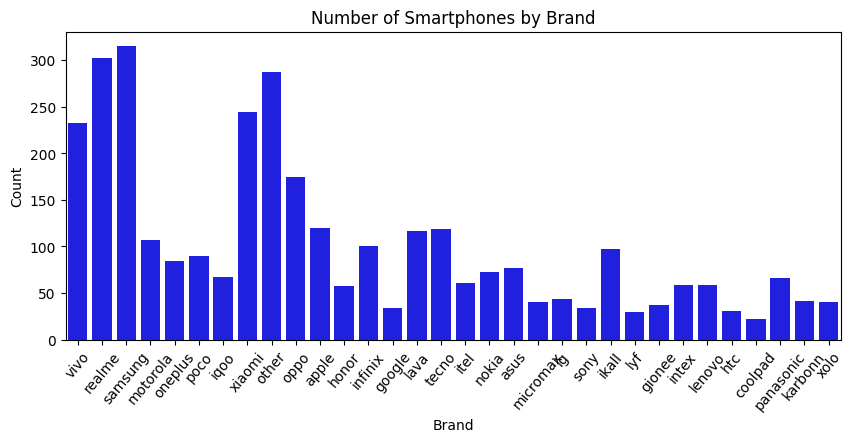

In [23]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df1, x='brand_name', color='blue')
plt.title("Number of Smartphones by Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=50)
plt.show()

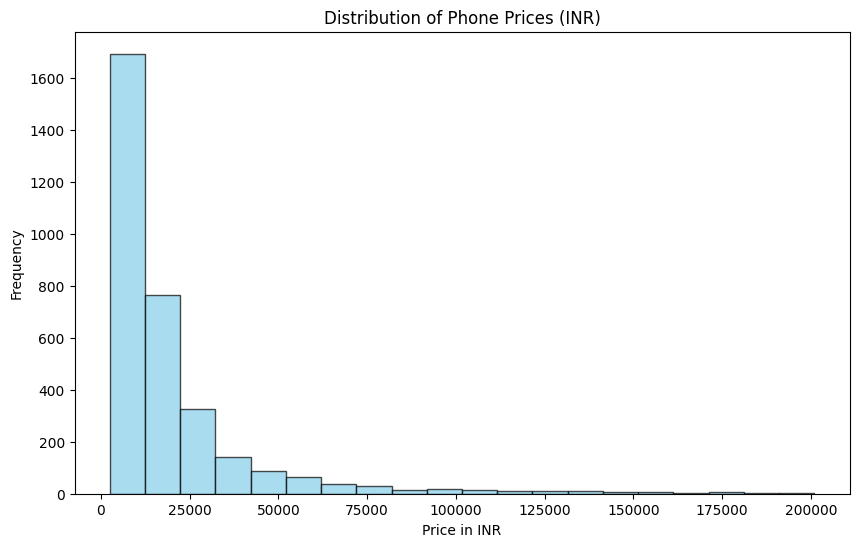

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df1['Price'], bins=20, color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Distribution of Phone Prices (INR)')
plt.xlabel('Price in INR')
plt.ylabel('Frequency')
plt.show()


##### Checking the Skweness for the data distribution


In [25]:
numeric_cols = df1.select_dtypes(include=['number'])
skewness_values = numeric_cols.apply(skew)
print(skewness_values)

Price                   3.344206
RAM                     1.002091
storage                 3.173213
Battery_cap             1.243023
num_core               -1.454059
primary_rear_camera     2.028487
Num_Rear_Cameras        0.385007
primary_front_camera    1.739487
num_front_camera        5.837225
display_size(inch)     -1.097738
refresh_rate(hz)       -1.613383
dtype: float64


In [26]:
numeric_cols_for_plots = ['Price', 'RAM', 'storage', 'Battery_cap', 'num_core',
                          'primary_rear_camera', 'Num_Rear_Cameras', 'primary_front_camera',
                          'num_front_camera', 'display_size(inch)', 'refresh_rate(hz)']

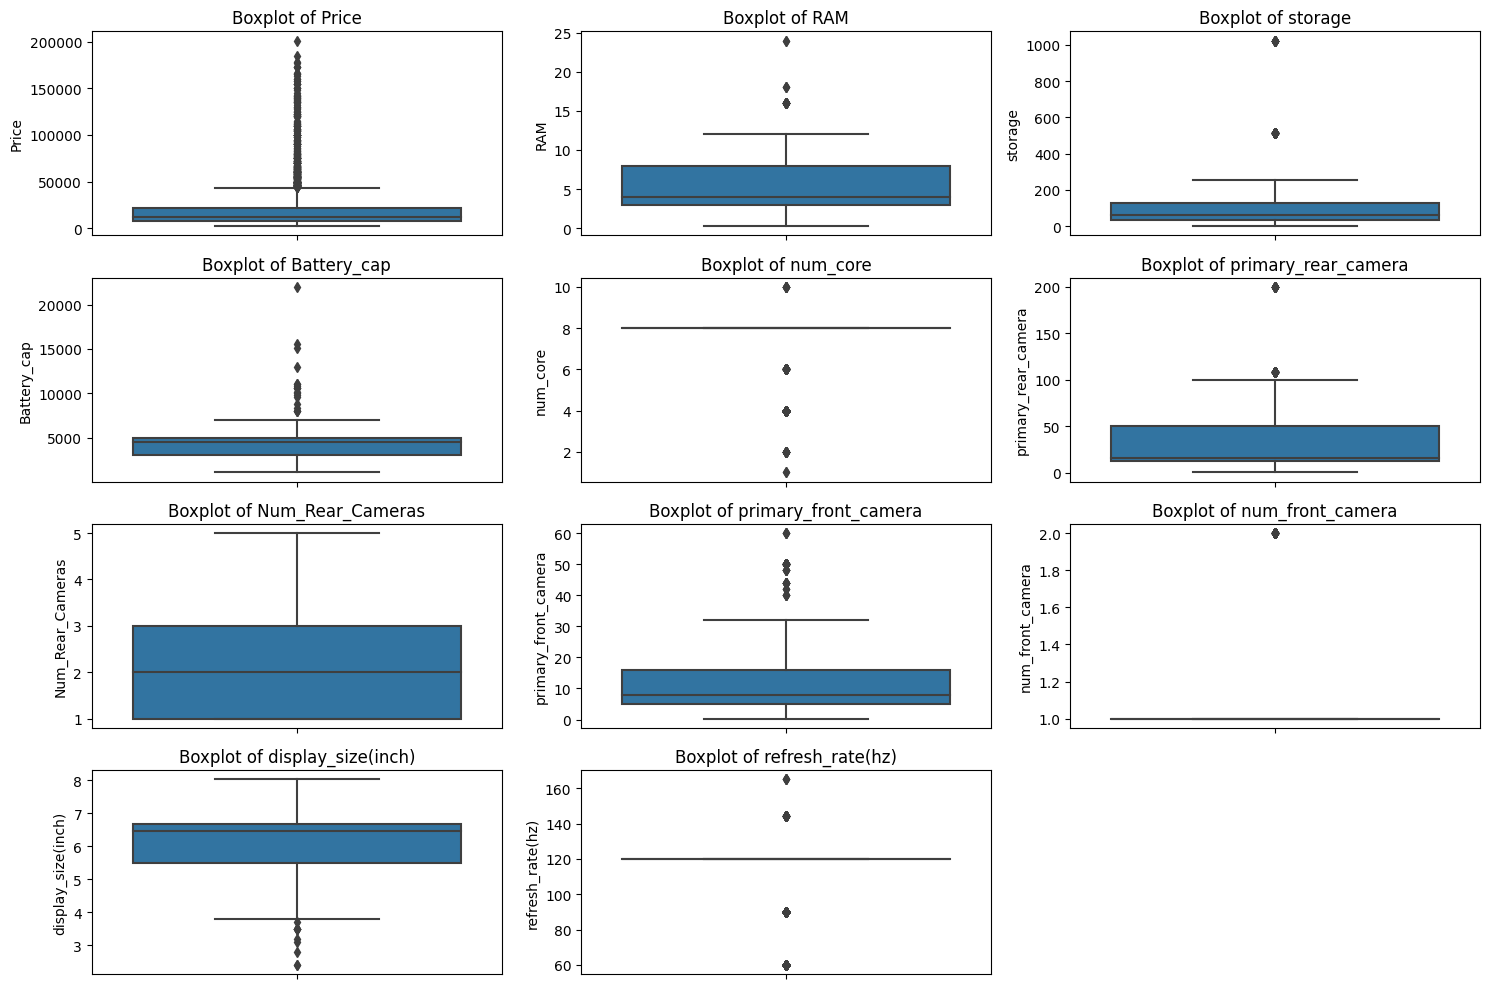

In [27]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols_for_plots, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### Correlation analysis for numerical features

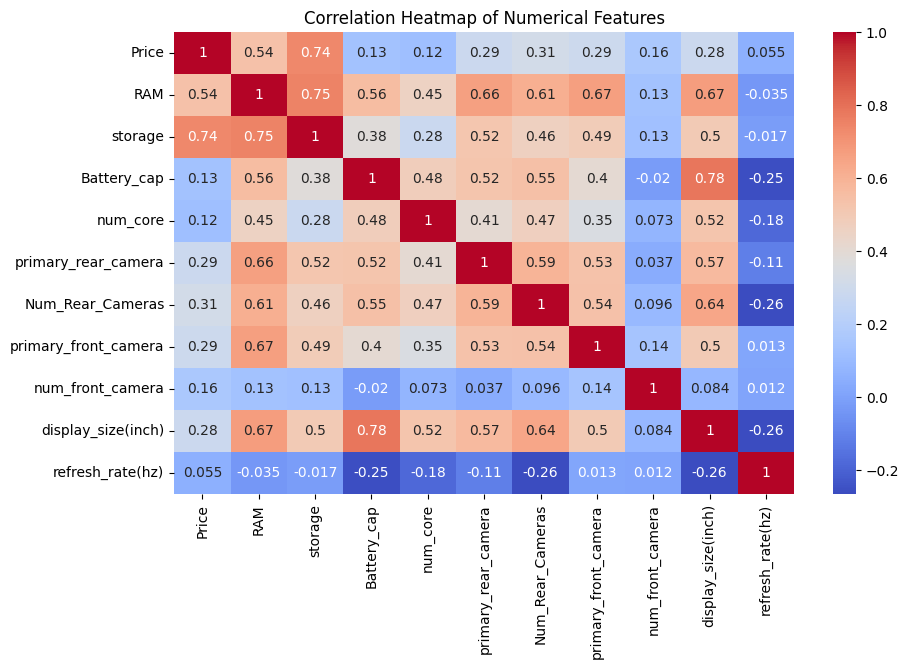

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1[['Price', 'RAM', 'storage', 'Battery_cap', 'num_core',
                'primary_rear_camera', 'Num_Rear_Cameras', 'primary_front_camera',
                'num_front_camera', 'display_size(inch)', 'refresh_rate(hz)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#### Checking the distribution

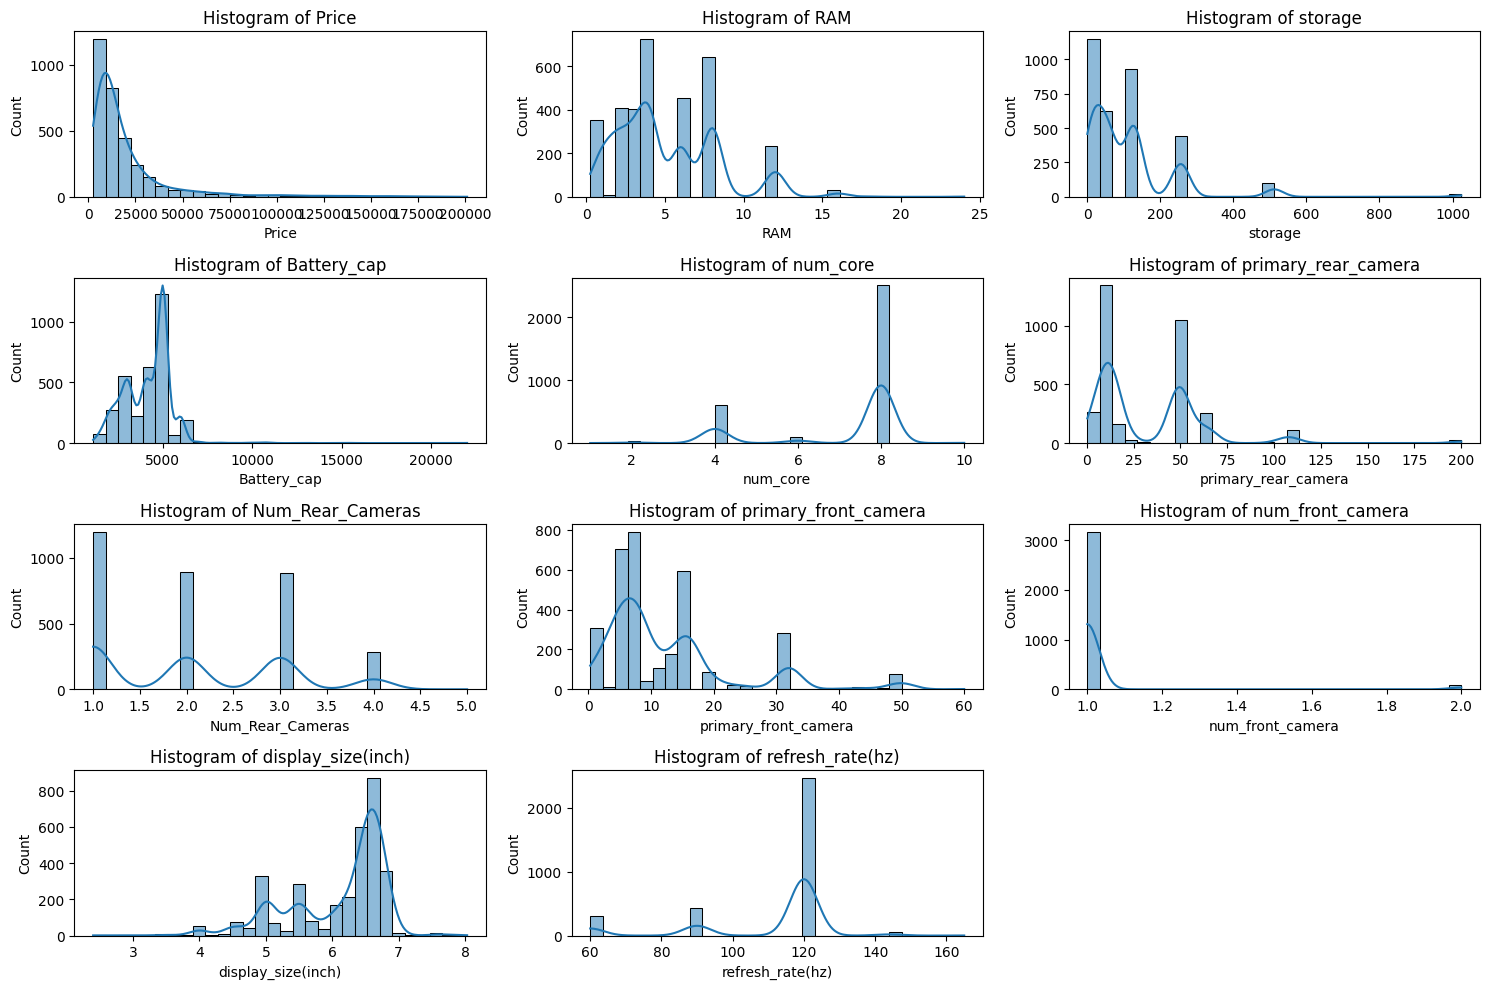

In [29]:
#Histogram
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

### Now we'll apply transformation, remove outliers and other

#### Applying transformations for the `price` column

#### Make a copy of Price for transformations

In [30]:
original_price = df1['Price'].copy()

In [31]:
min_price = df1['Price'].min()
if min_price <= 0:
    df1['Price_BoxCox_Input'] = df1['Price'] + abs(min_price) + 1
else:
    df1['Price_BoxCox_Input'] = df1['Price']

#### Apply Box-Cox transformation

In [32]:
df1['Price_BoxCox'], lambda_boxcox = boxcox(df1['Price_BoxCox_Input'])

In [33]:
# Apply Log transformation for comparison
df1['Price_Log'] = np.log1p(df1['Price'])

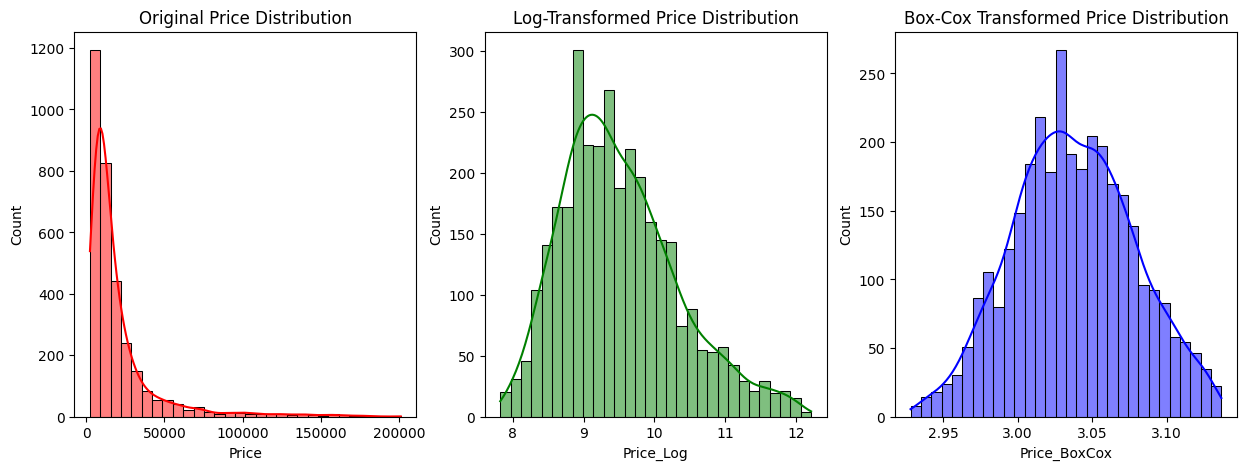

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df1['Price'], bins=30, kde=True, color="red", edgecolor="black")
plt.title("Original Price Distribution")
plt.xlabel("Price")

plt.subplot(1, 3, 2)
sns.histplot(df1['Price_Log'], bins=30, kde=True, color="green", edgecolor="black")
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Price_Log")

plt.subplot(1, 3, 3)
sns.histplot(df1['Price_BoxCox'], bins=30, kde=True, color="blue", edgecolor="black")
plt.title("Box-Cox Transformed Price Distribution")
plt.xlabel("Price_BoxCox")
plt.show()

df1['Price_Original'] = df1['Price']  # Save the original price
df1['Price'] = df1['Price_BoxCox']  # Replace with transformed price

#### from the above graph we can see that `Box_cox` shows the better distribution so we'll drop the `log_transformation` columns which was created

In [35]:
df1.head()

,brand_name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,...,Num_Rear_Cameras,primary_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types,Price_BoxCox_Input,Price_BoxCox,Price_Log,Price_Original
0,vivo,3.085026,8.0,android,128.0,6000,Yes,Yes,No,Yes,...,2,50.0,1,6.77,120.0,amoled display,34999,3.085026,10.463103,34999
1,realme,3.065877,8.0,android,128.0,6000,Yes,Yes,No,Yes,...,2,16.0,1,6.83,120.0,amoled display,21999,3.065877,9.998798,21999
2,realme,3.076169,8.0,android,128.0,6000,Yes,Yes,No,Yes,...,3,32.0,1,6.83,120.0,oled display,27999,3.076169,10.239960,27999
3,samsung,3.126304,12.0,android,256.0,5000,Yes,Yes,Yes,Yes,...,4,12.0,1,6.90,120.0,amoled display,129999,3.126304,11.775290,129999
4,vivo,3.067833,8.0,android,128.0,5500,Yes,Yes,No,Yes,...,2,16.0,1,6.77,120.0,amoled display,22999,3.067833,10.043249,22999


#### Now we'll apply log_transformation for the `RAM`, `storage`, `Battery_cap`, `primary_rear_camera`, `primary_front_camera` as it shows the skewness

In [36]:
# Transform skewed features using log transformation
skewed_cols = ['RAM', 'storage', 'Battery_cap', 'primary_rear_camera', 'primary_front_camera']
for col in skewed_cols:
    if skew(df1[col]) > 0.5:  # Apply if skewness > 0.5
        df1[col] = np.log1p(df1[col])

In [37]:
print("Skewness after transformation:")
print(df1[skewed_cols].skew())

Skewness after transformation:
RAM                    -0.204456
storage                -0.360394
Battery_cap            -0.792157
primary_rear_camera     0.028344
primary_front_camera   -0.272094
dtype: float64


In [38]:
# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


# Apply to relevant columns
outlier_cols = ['Price', 'RAM', 'storage', 'Battery_cap', 'primary_rear_camera', 'primary_front_camera']
for col in outlier_cols:
    df1 = cap_outliers(df1, col)

In [39]:
df1.head(3)

,brand_name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,...,Num_Rear_Cameras,primary_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types,Price_BoxCox_Input,Price_BoxCox,Price_Log,Price_Original
0,vivo,3.085026,2.197225,android,4.859812,8.699681,Yes,Yes,No,Yes,...,2,3.931826,1,6.77,120.0,amoled display,34999,3.085026,10.463103,34999
1,realme,3.065877,2.197225,android,4.859812,8.699681,Yes,Yes,No,Yes,...,2,2.833213,1,6.83,120.0,amoled display,21999,3.065877,9.998798,21999
2,realme,3.076169,2.197225,android,4.859812,8.699681,Yes,Yes,No,Yes,...,3,3.496508,1,6.83,120.0,oled display,27999,3.076169,10.239960,27999


### Feature Engineering 

#### Here we're categorizing the RAM in different and applying `log_transformation`

In [40]:
df1['RAM_category'] = pd.cut(df1['RAM'], 
                           bins=[0, np.log1p(4), np.log1p(8), np.log1p(12), np.log1p(24)], 
                           labels=['low', 'medium', 'high', 'very_high'])

#### Encoding it for correct ordinal feature

In [41]:
df1['RAM_category'] = df1['RAM_category'].map({'low': 0, 'medium': 1, 'high': 2, 'very_high': 3}).fillna(0).astype(int)

In [42]:
df1['camera_quality'] = df1['primary_rear_camera'] * df1['Num_Rear_Cameras'].astype(float)

In [43]:
df1['battery_category'] = pd.cut(df1['Battery_cap'], bins=[0, 3500, 4500, 6000], labels=['small', 'medium', 'big'])

In [44]:
df1['battery_category'] = df1['battery_category'].map({'small': 0, 'medium': 1, 'big': 2}).fillna(0).astype(int)

In [45]:
df1.columns

Index(['brand_name', 'Price', 'RAM', 'OS', 'storage', 'Battery_cap',
       'has_fast_charging', 'has_fingerprints', 'has_nfc', 'has_5g',
       'processor_brand', 'num_core', 'primary_rear_camera',
       'Num_Rear_Cameras', 'primary_front_camera', 'num_front_camera',
       'display_size(inch)', 'refresh_rate(hz)', 'display_types',
       'Price_BoxCox_Input', 'Price_BoxCox', 'Price_Log', 'Price_Original',
       'RAM_category', 'camera_quality', 'battery_category'],
      dtype='object')

#### Feature Scaling

#### Encoding binary columns

In [46]:
# Convert binary columns to numeric
binary_cols = ['has_fast_charging', 'has_fingerprints', 'has_nfc', 'has_5g']
for col in binary_cols:
    df1[col] = df1[col].map({'Yes': 1, 'No': 0})

In [47]:
# Encode categorical columns
categorical_cols = ['brand_name', 'OS', 'processor_brand', 'display_types']
df_encoded = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)

In [48]:
object_cols = df_encoded.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    print(f"Warning: There are still object columns: {object_cols}")
    # Convert any remaining object columns to numeric if possible
    for col in object_cols:
        try:
            df_encoded[col] = pd.to_numeric(df_encoded[col])
        except:
            print(f"Could not convert {col} to numeric, dropping it")
            df_encoded = df_encoded.drop(col, axis=1)


In [49]:
# Clean up temporary transformation columns
df_encoded.drop(['Price_BoxCox_Input', 'Price_Log'], axis=1, errors='ignore', inplace=True)

### Splitting the data into `features` and `target`

In [50]:
# Split data into features and target
X = df_encoded.drop(['Price', 'Price_Original'], axis=1, errors='ignore')
y = df_encoded['Price']

### Train Test split

In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print("\nTraining XGBoost model...")
# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,learning_rate=0.1,max_depth=5,
min_child_weight=1,subsample=0.8,colsample_bytree=0.8,random_state=42)


Training XGBoost model...


In [53]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

#### Prediction of test set

In [54]:
y_pred_transformed = xgb_model.predict(X_test)

In [55]:
# Convert predictions back to original scale
y_pred_original = inv_boxcox(y_pred_transformed, lambda_boxcox)

In [56]:
# Get original scale of test data for evaluation
y_test_original = df_encoded.loc[y_test.index, 'Price_Original']

#### Model Evalution

In [ ]:
print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_original, y_pred_original):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_original, y_pred_original)):.2f}")
print(f"R-squared: {r2_score(y_test_original, y_pred_original):.4f}")



Model Evaluation:
Mean Absolute Error: INR 786.84
Root Mean Squared Error: INR 2823.30
R-squared: 0.9837


#### Feature Importance

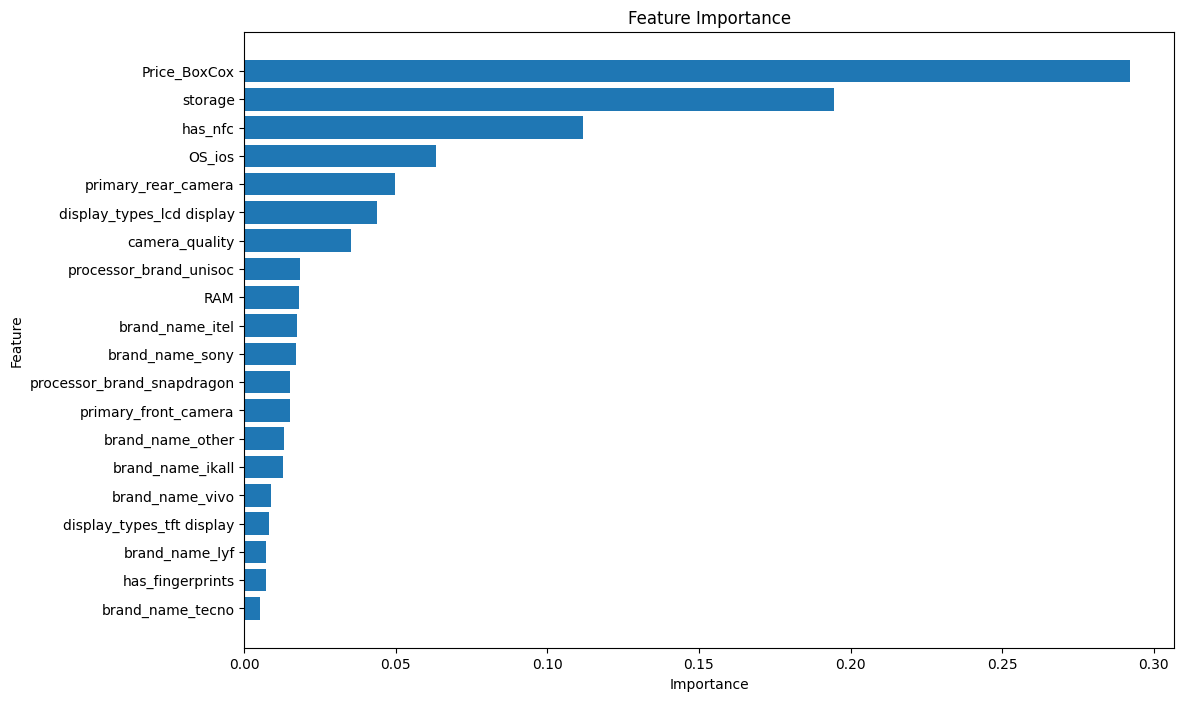

In [58]:

plt.figure(figsize=(12, 8))
feature_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False).head(20)

plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()


#### Applying cross validation 

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np

print("\nPerforming 5-fold cross-validation...")
# Get predictions in the transformed scale
y_pred_transformed = cross_val_predict(xgb_model, X, y, cv=5)

# Invert Box-Cox transformation for predictions and true values
y_pred_inr = inv_boxcox(y_pred_transformed, lambda_boxcox)
y_true_inr = inv_boxcox(y, lambda_boxcox)

# Calculate RMSE in INR
rmse_scores_inr = []
for fold in range(5):
    fold_indices = np.array_split(np.arange(len(y)), 5)[fold]
    fold_rmse = np.sqrt(mean_squared_error(y_true_inr[fold_indices], y_pred_inr[fold_indices]))
    rmse_scores_inr.append(fold_rmse)

print(f"Cross-validation RMSE in INR: {rmse_scores_inr}")
print(f"Mean RMSE: {np.mean(rmse_scores_inr):.2f}, Std Dev: {np.std(rmse_scores_inr):.2f}")


Performing 5-fold cross-validation...
Cross-validation RMSE in INR: [4180.054044186636, 2160.009996100613, 2071.564767769247, 1620.268165761386, 1239.9217879589276]
Mean RMSE in INR: 2254.36, Std Dev: 1018.01


In [ ]:
def predict_smartphone_price(model, features_dict, lambda_val, min_price=2500, max_price=200999):
    try:
        features_df = pd.DataFrame([features_dict])
        print("Input features:", features_dict)
        
        # Apply log1p to skewed numerical columns
        for col in skewed_cols:
            if col in features_df.columns and features_df[col].iloc[0] > 0:
                features_df[col] = np.log1p(features_df[col])
        print("After log1p:", features_df)
        
        # Encode categorical variables
        for col in categorical_cols:
            if col in features_df.columns:
                features_df = pd.get_dummies(features_df, columns=[col], drop_first=True)
        print("After dummies:", features_df.columns)
        
        # Align with training data columns
        missing_cols = set(X.columns) - set(features_df.columns)
        for col in missing_cols:
            features_df[col] = 0
        features_df = features_df[X.columns]
        print("Final features shape:", features_df.shape)
        
        # Predict and reverse Box-Cox transformation
        pred_transformed = model.predict(features_df)[0]
        print("Transformed prediction:", pred_transformed)
        pred_original = inv_boxcox(pred_transformed, lambda_val)
        print("Raw prediction :", pred_original)
        
        # Clip to realistic INR range
        pred_original = np.clip(pred_original, min_price, max_price)
        
        return round(pred_original, 2)
    except Exception as e:
        print(f"Error in prediction: {e}")
        return None

In [ ]:
sample_phone = {
    'RAM': 8,
    'storage': 128,
    'Battery_cap': 5000,
    'has_fast_charging': 1,
    'has_fingerprints': 1,
    'has_nfc': 1,
    'has_5g': 1,
    'num_core': 8,
    'primery_rear_camera': 64,  # Corrected typo
    'Num_Rear_Cameras': 4,
    'primery_front_camera': 16,  # Corrected typo
    'num_front_camera': 1,
    'display_size(inch)': 6.5,
    'refresh_rate(hz)': 120,
    'brand_name': 'samsung',
    'OS': 'android',
    'processor_brand': 'snapdragon',
    'display_types': 'amoled display'
}

predicted_price = predict_smartphone_price(xgb_model, sample_phone, lambda_boxcox)
print(f"\nPredi cted price for the sample smartphone:  {predicted_price}")

Input features: {'RAM': 8, 'storage': 128, 'Battery_cap': 5000, 'has_fast_charging': 1, 'has_fingerprints': 1, 'has_nfc': 1, 'has_5g': 1, 'num_core': 8, 'primery_rear_camera': 64, 'Num_Rear_Cameras': 4, 'primery_front_camera': 16, 'num_front_camera': 1, 'display_size(inch)': 6.5, 'refresh_rate(hz)': 120, 'brand_name': 'samsung', 'OS': 'android', 'processor_brand': 'snapdragon', 'display_types': 'amoled display'}
After log1p:         RAM   storage  Battery_cap  has_fast_charging  has_fingerprints  \
0  2.197225  4.859812     8.517393                  1                 1   

   has_nfc  has_5g  num_core  primery_rear_camera  Num_Rear_Cameras  \
0        1       1         8                   64                 4   

   primery_front_camera  num_front_camera  display_size(inch)  \
0                    16                 1                 6.5   

   refresh_rate(hz) brand_name       OS processor_brand   display_types  
0               120    samsung  android      snapdragon  amoled display 